# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhamad Bintang Ramadhan
- **Email:** m312d4ky2615@bangkit.academy
- **ID Dicoding:** bintang_ramadhan_123

## Menentukan Pertanyaan Bisnis

- Seberapa pengaruh musim terhadap pelanggan?
- Apakah suhu/temperatur berpengaruh terhadap pelanggan?

## Import Semua Packages/Library yang Digunakan

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [8]:
day_df = pd.read_csv("./day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
hour_df = pd.read_csv("./hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


 Pada data day dan hour semua kolom data berjumlah 731 dan 17379 non-null maka data tidak terdapat missing values, namun kolom dteday bertipe object sehingga harus diubah menjadi type date

In [12]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Terbukti tidak terdapat missing value

In [14]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Kedua data day dan hour tidak memiliki duplikasi data dan memiliki statistika deskriptif yang normal sehingga tidak terdapat inaccurate value

### Cleaning Data

Mengubah type data kolom dteday menjadi type datetime

In [16]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [18]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [19]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore day

In [20]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Rata-rata terdapat 4504 pelanggan rental sepeda per hari nya 

In [21]:
day_df.groupby(by="holiday").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                                
          max   min         mean          std
holiday                                      
0        8714    22  4527.104225  1929.013947
1        7403  1000  3735.000000  2103.350660

Disaat hari libur rata-rata terdapat 3735 pelanggan per hari, di sisi lain pada hari biasa memiliki rata-rata pelanggan yang lebih besar yaitu 4527 pelanggan per harinya.

In [22]:
day_df["weather"] = day_df.season.apply(lambda x: "springer" if x == 1 else("summer" if x == 2 else("fall" if x == 3 else "winter")))
day_df.groupby(by="weather").agg({"cnt": ["max", "min", "mean", "std"]})

cnt                                
           max   min         mean          std
weather                                       
fall      8714  1115  5644.303191  1459.800381
springer  7836   431  2604.132597  1399.942119
summer    8362   795  4992.331522  1695.977235
winter    8555    22  4728.162921  1699.615261

pada musim fall, rata-rata pelanggan menjadi yang tertinggi yaitu sebesar 5644 pelanggan per hari nya dan musim springer menjadi musim dengan rata-rata pelanggan terendah yaitu hanya sebesar 2604 pelanggan per hari nya.

### Explore hour

In [23]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Rata-rata terdapat 189 pelanggan per jam dengan min 1 pelanggan per jam dan maks 977 pelanggan per jam.

In [24]:
hour_df["Suhu_celcius"] = hour_df["temp"]*41
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Suhu_celcius
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,20.376474
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,13.940000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,20.500000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,27.060000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,41.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,7.894801


Jika kita ubah nilai temp menjadi suhu celcius maka terlihat suhu paling dingin berada di angka 0,82 celcius dan paling panas di angka 41 celcius.

In [25]:
hour_df["suhu"] = hour_df.Suhu_celcius.apply(lambda x: "0-10" if x <= 10 else ("10-20" if x > 10 and x <= 20 else("20-30" if x >20 and x <= 30 else "30-41")))
hour_df.groupby(by="suhu").agg({"cnt": ["max", "min", "mean", "std"]})

cnt                            
       max min        mean         std
suhu                                  
0-10   729   1   69.995529   90.778128
10-20  837   1  144.166403  140.444671
20-30  977   1  223.045278  196.697196
30-41  953   4  328.323404  184.616966

Terlihat bahwa semakin tinggi suhu ternyata membuat minat pelanggan semakin tinggi

## Visualization & Explanatory Analysis

### Seberapa pengaruh musim terhadap pelanggan?

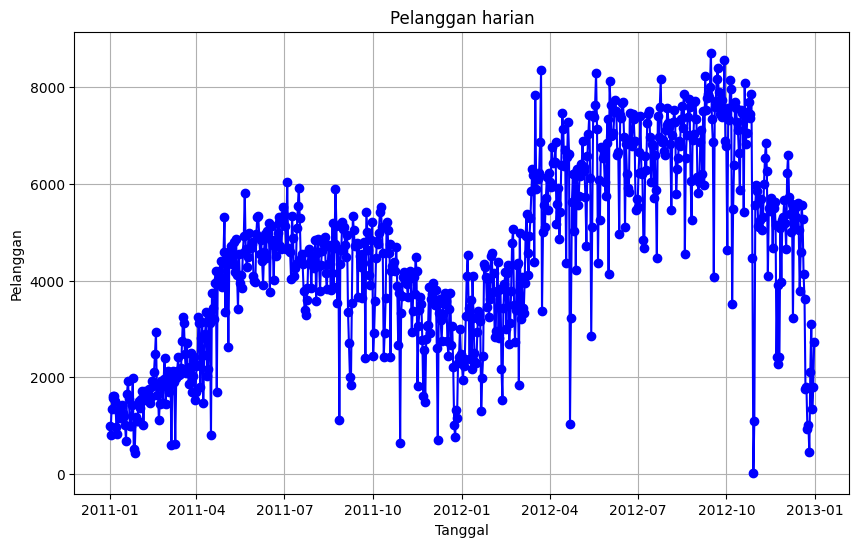

In [26]:
df = pd.DataFrame({'Tanggal': day_df["dteday"], 'Nilai': day_df["cnt"]})

plt.figure(figsize=(10, 6))
plt.plot(df['Tanggal'], df['Nilai'], marker='o', linestyle='-', color='b')

plt.xlabel('Tanggal')
plt.ylabel('Pelanggan')
plt.title('Pelanggan harian')

plt.grid(True)

plt.show()

Dari data harian pelanggan rental sepeda selama 2 tahun, terlihat sebenarnya terdapat peningkatan pelanggan secara keseluruhan pada 2012 dibandingkan 2011. Jika dilihat dari polanya, pada bulan 1 hingga bulan 7 akan terjadi peningkatan pelanggan dan dari bulan 7 hingga bulan 10 merupakan puncak pelanggan terbanyak dan menuju akhir tahun akan terjadi penurunan pelanggan kembali.

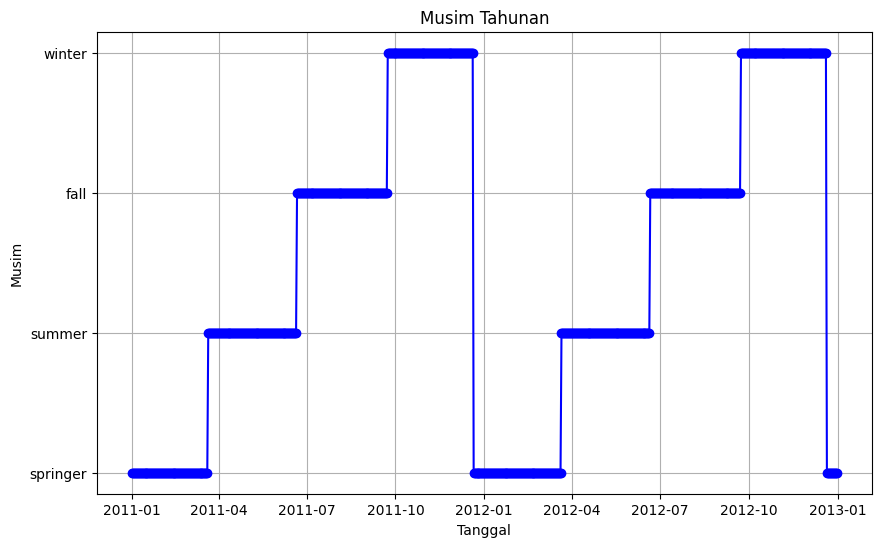

In [27]:
df = pd.DataFrame({'Tanggal': day_df["dteday"], 'Nilai': day_df["weather"]})

plt.figure(figsize=(10, 6))
plt.plot(df['Tanggal'], df['Nilai'], marker='o', linestyle='-', color='b')

plt.xlabel('Tanggal')
plt.ylabel('Musim')
plt.title('Musim Tahunan')

plt.grid(True)

plt.show()

Jika dilihat berdasarkan musim, maka peningkatan pelanggan di awal tahun terjadi dikarenakan mulainya musim springer hingga summer dan puncaknya pada musim fall. Dan menuju akhir tahun terjadi penurunan pelanggan dikarenakan mulai memasukinya musim winter.

C:\Users\Bintang\AppData\Local\Temp\ipykernel_35096\1886906912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_df["weather"], y=day_df["cnt"], palette='Blues')


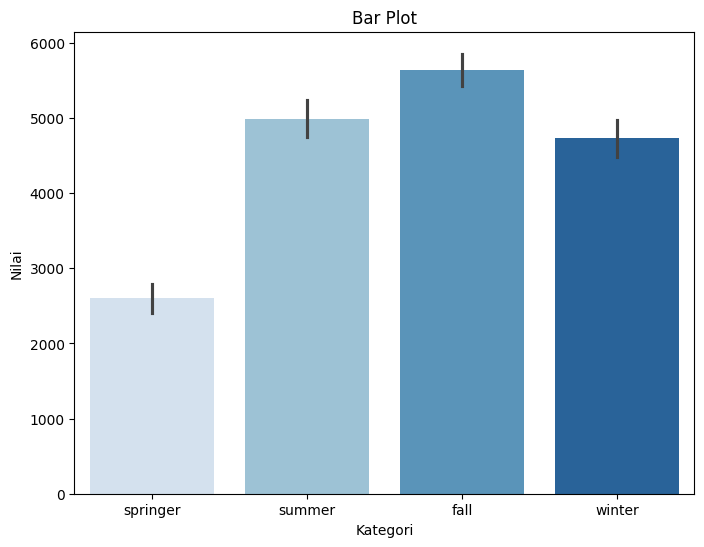

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(x=day_df["weather"], y=day_df["cnt"], palette='Blues')

# Menambahkan label dan judul
plt.xlabel('Kategori')
plt.ylabel('Nilai')
plt.title('Bar Plot')

# Menampilkan plot
plt.show()

Walaupun pada musim winter terjadi penurunan pelanggan, namun untuk keseluruhan rata-rata pelanggan, pada musim fall menjadi musim dengan rata-rata pelanggan terbanyak dan musim springer menjadi musim dengan rata-rata pelanggan paling sedikit.

### Apakah suhu/temperatur berpengaruh terhadap pelanggan?

C:\Users\Bintang\AppData\Local\Temp\ipykernel_35096\4055570532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_df["suhu"], y=hour_df["cnt"], palette='Blues')


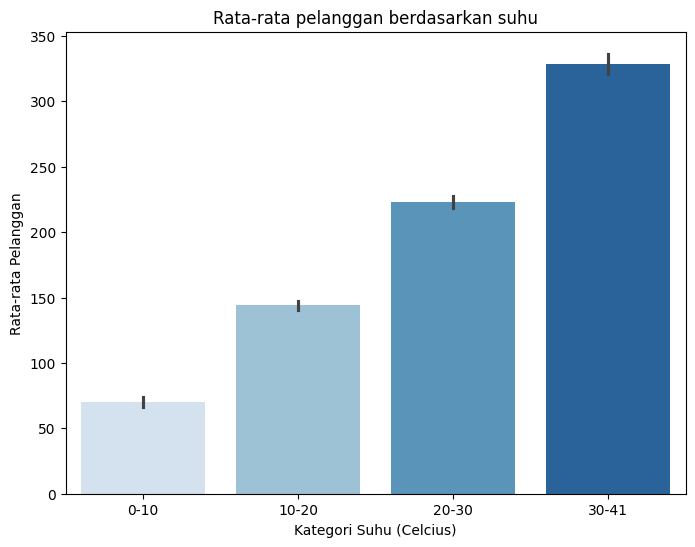

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x=hour_df["suhu"], y=hour_df["cnt"], palette='Blues')

# Menambahkan label dan judul
plt.xlabel('Kategori Suhu (Celcius)')
plt.ylabel('Rata-rata Pelanggan')
plt.title('Rata-rata pelanggan berdasarkan suhu')

# Menampilkan plot
plt.show()

Berdasarkan penjelasan sebelumnya juga, visualisasi ini memberikan gambaran lebih jelas bahwa pelanggan banyak yang lebih memilih untuk menyewa sepeda disaat suhu tinggi dibanding disaat suhu rendah.

## Conclusion

- Conclution pertanyaan 1
Pada data harian, setiap tahun memiliki pola data bahwa pada bulan 1-7 pelanggan mengalami tren naik dan puncaknya pada bulan 7-10 pelanggan mencapai jumlah terbanyaknya dikarenakan bulan 7-9 merupakan musim fall. Setelah bulan 10 menuju akhir tahun mengalami tren turun dikarenakan mulai memasukinya musim winter. Namun secara rata-rata pelanggan pada fall menjadi rata-rata pelanggan yang terbanyak dan pada springer yaitu periode bulan 1-3 menjadi rata-rata pelanggan paling sedikit.
- Conclution pertanyaan 2
Pelanggan lebih banyak yang menyukai bersepeda disaat cuaca panas dibandingkan saat cuaca dingin, hal ini berkorelasi juga dengan musim yang ada.